In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #$\color{red}{\text{ciao}}$

![title](fig_intro.png)

# Python para Finanzas y Ciencia de Datos
____

# Módulo 4
#### Profesor: Jonatan Saúl

1. Statistics Concepts
2. Portfolio Optimization
3. Principal Component Analysis (PCA)
4. Value-at-Risk (VaR)
____

![title](fig_intro.png)

In [2]:
# IMPORTAMOS LAS LIBRERÍAS QUE VAMOS A USAR A LO LARGO DEL MÓDULO.
import numpy as np
import pandas as pd

from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from numpy.random import multivariate_normal
import yfinance as yf

import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import gaussian_kde

import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import seaborn as sns

#import functions as f 

import random
random.seed(1000)


![title](fig_intro.png)

# Some important statistics concepts

### Random variables and probability functions

A **random variable** is a function that maps the outcomes of random phenomena to a unique numerical value.

A random variable can be **discrete** or **continuous**.  
+ A discrete random variable $X$ has a countable number of possible values, e.g: rolling a dice. 
+ A continuous random variable $X$ takes all values in a given interval of numbers, e.g: the returns of a risky asset.

The function that relates outcomes to their probabilities in continuous random variables is called **probability density function (PDF)**.

The **distribution function** shows the probability of receiving an outcome or a lower one, that is, it shows the cumulative probabilities.

Let $X$ be a random variable, $q$ certain realization of that random variable, $f(x)$ the probability density function and $F(x)$ the distribution probability, then the probability that $X \leq q$ is:

$$ F(q) = \int_{-\infty}^{q}f(x)dx$$


<h4 align="center"> Density function and Boxplot </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png' width="40%" align="center"/>

### Moments of a random variable

**Expectation**

In probability theory, the expected value of a random variable $X$, $E(X)$ or $E[X]$, is a generalization of the weighted average, and is intuitively the arithmetic mean of a large number of independent realizations of $X$.

The expectation of $X$, $\mu$, is the expected value or mean of the variable. It is defined by:

$$\mu_x = E(X) = \int_{-\infty}^{\infty}x f(x) dx$$

or
$$ \mu_x=\sum_{i=1}^{N}X_i Pr(X_i)$$
in the discrete case. 



**Variance**

The variance of $X$ measures the spread of the variable around its mean. It is defined by:

$$\sigma^2_x = E \left[ (X - \mu)^2\right] = \int_{-\infty}^{\infty}(x - \mu)^2 f(x) dx$$

And the discrete case:
$$ \sigma^2_x = \sum_{i=1}^{N}(X_i-\mu)^2 Pr(X_i) $$




#### Higher order moments:

The *k-th* moment of a random variable $X$ is defined by:
$$m_k' = E(X^k)= \int_{-\infty}^\infty x^k\,f(x)\,\mathrm{d}x $$

and the *k-th* centered moment of a random variable is defined by:
$$m_k = E\left[ (X - \mu) ^k \right] = \int_{-\infty}^\infty (x - \mu)^k\,f(x)\,\mathrm{d}x$$

Note that the first moment is the mean and the second centered moment is the variance.

**Skewness** and **Kurtosis** are functions of the third and fourth moments.


**Skewness**:
It is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). 

$$ \gamma = \frac{m_3}{\sigma^3} =  \frac{\int_{-\infty}^\infty (x - \mu)^3\,f(x)\,\mathrm{d}x}{\left[\int_{-\infty}^\infty (x - \mu)^2\,f(x)\,\mathrm{d}x\right]^{\frac{3}{2}}}$$

where $ m_{3}$ third centered moment.

The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
As a general rule of thumb:

 - If $\gamma $ is less than -1 or greater than 1, the distribution is highly skewed.
 - If $\gamma $ is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
 - If $\gamma $ is between -0.5 and 0.5, the distribution is approximately symmetric.

<img src='https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png' width="60%"/>


**Kurtosis**: 
This statistic tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

$$ \beta = \frac{m_4}{\sigma^4} =  \frac{\int_{-\infty}^\infty (x - \mu)^4\,f(x)\,\mathrm{d}x}{\left[\int_{-\infty}^\infty (x - \mu)^2\,f(x)\,\mathrm{d}x\right]^{2}}$$


 - If the $\beta$ equals 3, the distribution is normal (mesokurtic).
 - If the $\beta$ is less than 3, the distribution is platykurtic.
 - If the $\beta$ is greater than 3, the distribution is leptokurtic.

<img src='https://cdn-images-1.medium.com/max/1600/1*Nqu07THa7APRTOF7kaVr5Q.jpeg' width='40%'/>



### Sample moments

When we collect date to study a random variable, what we got is the realization of that variable for each moment or individual. The true parameters of the variable in the population are unknown so we have to estimate them using the collected data: the sample.


#### Sample Mean:
$$\hat{\mu} = \dfrac{1}{n} \sum_{i=1}^nX_i$$

#### Sample Variance:

If $\mu$ is known, we can compute the sample variance by:

$$\hat{\sigma}^2= \dfrac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$$

In the more realistic case, in which $\mu$ is unknown we have to use the sample mean and adjust the formula in order to find the unbiased estimator for $\sigma^2$:

$$\hat{\sigma}^2= \dfrac{1}{N-1}\sum_{i=1}^N (x_i - \hat{\mu})^2$$

#### Sample Standard Deviation:
$$\hat{\sigma} = \sqrt{\hat{\sigma}^2}$$


#### Sample Skewness:
$$ \hat{\gamma} = \frac{\sum_{i=1}^{N}(X_i-\hat{\mu})^3}{N\hat{\sigma}^3}$$

#### Sample Kurtosis:
$$ \hat{\beta} = \frac{\sum_{i=1}^{N}(X_i-\hat{\mu})^4}{N\hat{\sigma}^4}$$


#### Normal distribution
The normal distribution is the most commonly used distribution mainly beacuse is more convenient to work with than most other distributions, and it is completely described by the first and second moments.

$X$ is normally distributed if it has the density:

$$ f(x; \mu, \sigma) = \dfrac{1}{\sqrt{2\pi}\sigma} \exp \left[ - \dfrac{1}{2} \left( \dfrac{x - \mu}{\sigma}\right)^2\right]$$

and we write $X \sim N (\mu , \sigma^2)$.

The normal distribution is unimiodal, symmetric and centered on $\mu$. The variance, $\sigma^2$, governs the dispertion of the distribution.

<h4 align="center"> Probability density function </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg' width="50%" align="center"/>

<h4 align="center"> Cumulative distribution function </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/c/ca/Normal_Distribution_CDF.svg' width="50%" align="center"/>



**Standard normal distribution**: Is the name given to the normal distribution with mean zero and unit variance, that is: $X \sim N (0,1) $.


#### Other distributions:
 - Student's $t$-distribution
 - Uniform distribution
 - Chi-square distribution
 
We can make use of numpy.random to simulate each type of random variable and see how their distributions look like.

https://www.w3schools.com/python/numpy_random.asp

In [3]:
# Standard Normal
norm = np.random.standard_normal(10000)
print('-'*100)
print('Simulating Standard Normal Variable')
print(type(norm))
print(np.shape(norm))
print('-'*100)

----------------------------------------------------------------------------------------------------
Simulating Standard Normal Variable
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


In [4]:
# Student t
t = np.random.standard_t(5,10000)

#Uniform
unif = np.random.uniform(-1,1,10000)

#Chi square
chi = np.random.chisquare(2, 10000)

We have generated 10000 observations of each random variable.

Each distribution has some **parameters** that define it. For instance, 
+ the normal distribution is defined by its mean and variance, 
+ the Student's t and Chi square distributions are defined by their degree of freedom, and 
+ the uniform distribution is defined by its minimum and maximum values.

The process of generating these many observations is known as **Monte Carlo simulations**. Let's see how these variables look like.

We can use gaussian_kde (kernel density estimation) to estimate the probability density function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [5]:
norm_density = gaussian_kde(norm) #

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [6]:
xn = np.linspace(min(norm), max(norm)) #

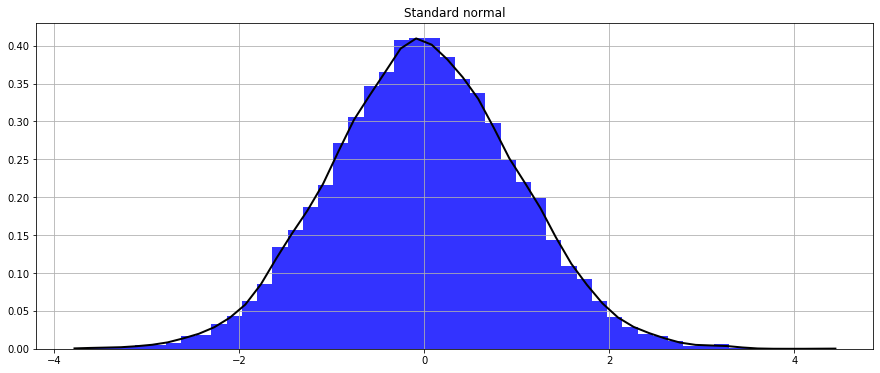

In [7]:
fig = plt.figure(figsize = (15,6))

plt.hist(norm, color = 'blue', bins = 50, density = True, alpha = 0.8)
plt.plot(xn, norm_density(xn), color = 'black', lw=2)
plt.title('Standard normal')
plt.grid(True)

In [8]:
# More variables...

t_density = gaussian_kde(t)
xt = np.linspace(min(t), max(t))

unif_density = gaussian_kde(unif)
xu = np.linspace(min(unif), max(unif))

chi_density = gaussian_kde(chi)
xch= np.linspace(min(chi), max(chi))

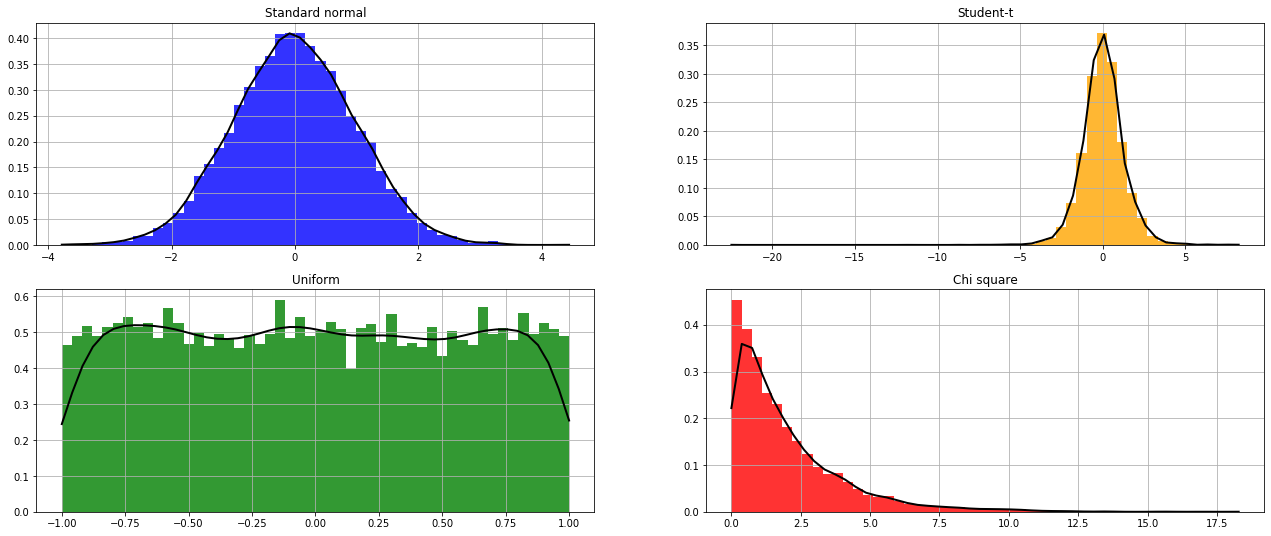

In [9]:
fig = plt.figure(figsize = (22,9))
plt.subplot(2,2,1)
plt.hist(norm, color = 'blue', bins = 50, density = True, alpha = 0.8)
plt.plot(xn, norm_density(xn), color = 'black', lw=2)
plt.title('Standard normal')
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(t, color = 'orange', bins = 50, density = True, alpha = 0.8 )
plt.plot(xt, t_density(xt), color = 'black', lw=2)
plt.title('Student-t')
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(unif, color = 'green', bins = 50, density = True, alpha = 0.8)
plt.plot(xu, unif_density(xu), color = 'black', lw=2)
plt.title('Uniform')
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(chi, color = 'red', bins = 50, density = True, alpha = 0.8)
plt.plot(xch, chi_density(xch), color = 'black', lw=2)
plt.title('Chi square')
plt.grid(True)

Let's work with the standard normal variable. 

We know that a standard normal distribution has mean = 0 and standard deviation = 1. 

Let's calculate those moments using our generated data.

In [10]:
mu_hat = norm.mean()
sigma_hat = norm.std()

print("The sample mean is " + str(np.round(mu_hat,4)))
print("The sample standard deviation is " + str(np.round(sigma_hat,4)))

The sample mean is -0.0086
The sample standard deviation is 0.9888


If we had all the population data, then we would have the true mean and variance of the variable. 

Since we are only working with a portion of that population (the sample), we will always have some estimation error.

### Skewness and kurtosis

We can also generate distributions using *scipy.stats*. 

The module *skewnorm* allows us to create asymmetric distributions. 

It takes a real number as the asymmetric parameter. 

When that number equals zero, the distribution is normal.

In [11]:
from scipy.stats import skewnorm, t

skew_a = [-50, 0, 50]
x0 = skewnorm.rvs(skew_a[0], size=10000)
x1 = skewnorm.rvs(skew_a[1],size=10000)
x2 = skewnorm.rvs(skew_a[2], size=10000)

In [12]:
print('Simulating asymmetric distributions')
print(type(x1))
print(np.shape(x1))
print('-'*100)

Simulating asymmetric distributions
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


''

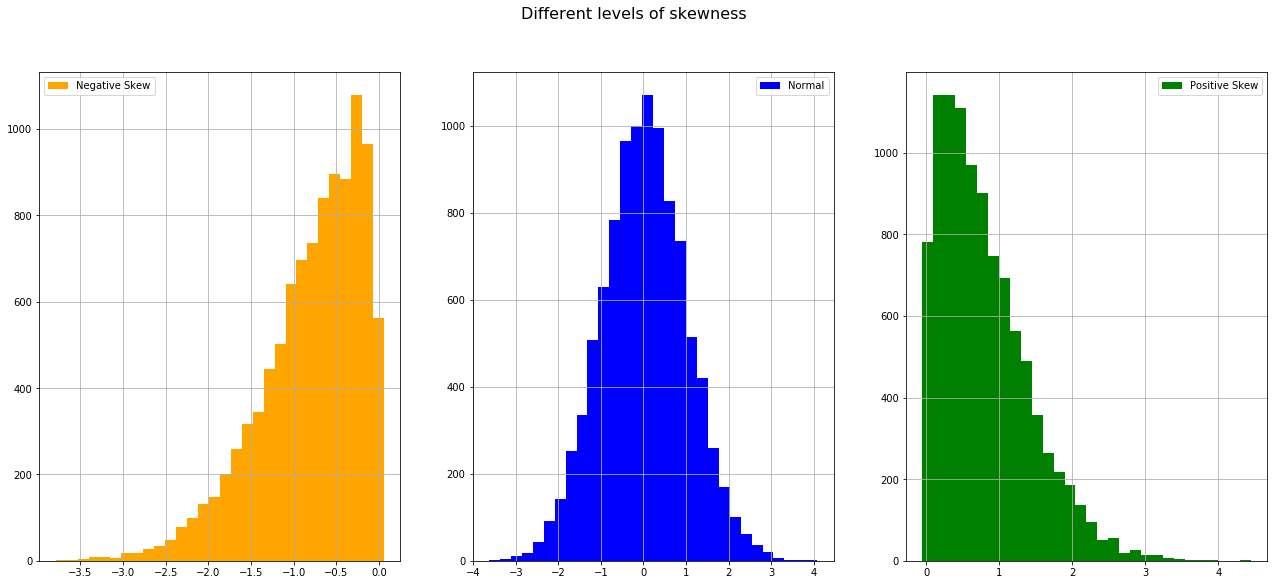

In [13]:
fig = plt.figure(figsize = (22,9))
fig.suptitle('Different levels of skewness', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(x0, color = 'orange', label='Negative Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper left')

plt.subplot(1,3,2)
plt.hist(x1, color = 'blue', label='Normal', bins = 30)
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(1,3,3)
plt.hist(x2, color = 'green', label='Positive Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper right')

;

Let's now create distributions with different levels of kurtosis 

In [14]:
df = [5, 10, 200] 

y0 = t.rvs(df[0], size=10000, loc =0)
y1 = t.rvs(df[1], size=10000, loc =0)
y2 = t.rvs(df[2], size=10000, loc =0)

In [15]:
print('Simulating distributions with different levels of kurtosis')
print(type(y1))
print(np.shape(y1))
print('-'*100)

Simulating distributions with different levels of kurtosis
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


''

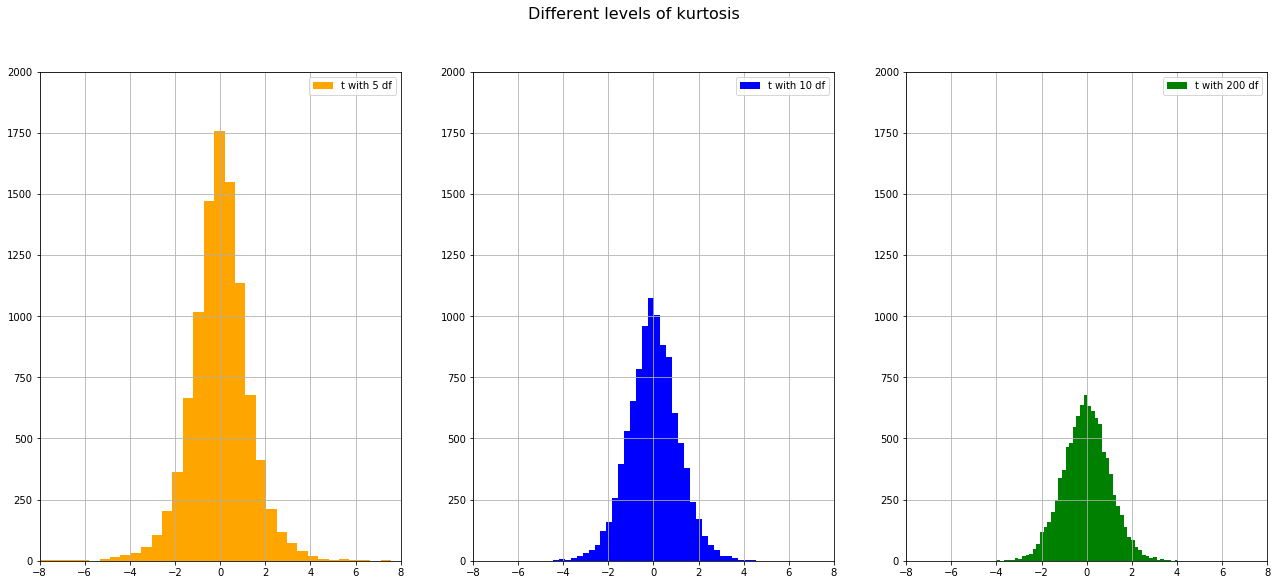

In [16]:
ylim = 2000
xlim = 8

fig = plt.figure(figsize = (22,9))
fig.suptitle('Different levels of kurtosis', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(y0, color = 'orange', label='t with 5 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,2)
plt.hist(y1, color = 'blue', label='t with 10 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,3)
plt.hist(y2, color = 'green', label='t with 200 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

;

![title](fig_intro.png)

# Portfolio optimization: Modern Portfolio Theory

* * *

In 1952, Harry Markowitz proposed a normative model for selection of risky assets. 

The basic assumption was that inversors care about the **return** and **risk** of their portfolios. 

His great contribution was to define **return** as the mean of the probability distribution of assets returns and **risk** as the variance of that distribution.

By defining risk as variance, Markowitz was able to quantify precisely the gains of diversification: through diversification, risk can be reduced (though not eliminated) without changing the expected portfolio return.


## Basic theory

### The expected return on a portfolio

The return of a risky asset *j* will be defined as

$$ R_{j,t,s} = \dfrac{P_{j,t,s} - P_{j,t-1}}{P_{j,t-1}}$$

Where $P$ denotes the price of the asset, $t-1$ is the date in which the asset is bought, $t$ is the date in which the asset is sold and $s$ denote the state of nature.

For simplicity, we will asume that the return's distribution is discrete and $\pi_s$ is the probability of each state of the nature. Thus, its expectation equals:

$$E(R_{j,t}) = \sum_{s = 1}^S \pi_s R_{j,t,s}$$

Consider a portfolio consisting of N assets, and let $\omega_j$ be the weight of each asset in the cost of the portfolio, then the return of this portfolio is:

$$R_{p,t,s}  = \sum_{j=1}^N \omega_j R_{j,t,s}$$

That is, the return on a portfolio is a weithed average of the returns of the assets in the portfolio.

The portfolio's expected return is also the weigthed average of the asset expected returns:

$$E(R_p) = \sum_{j=1}^N\omega_jE(R_j)$$


### Measurement of risk and diversification

The variance of an asset return equals:

$$\sigma_j^2 = E [R_j - E(R_j)]^2 = \sum_{s=1}^S \pi_s [R_j - E(R_j)]^2$$


In order to understand how can a portfolio reduce its risk through diversification, let's asume we only have two assets. The variance of this two-assets portfolio is:

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\sigma_{12}$$

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Note that the variance of the portfolio depends on the correlation between the assets. We will explore how different correlations have a different impact on the variance of the portfolio and therefore in diversification gains.


The entire model is described by mean and variance of the assets. 

Therefore we are necessarily assuming that no other statistics are necessary to describe the distribution of end-of-period wealth. 

Since normal distribution is determined by mean and variance, if returns are normal distributed then we can fully describe the investment opportunity set. We will need to verify this condition and in case it doesn't hold we will have to assume so.

We define the **invesment opportunity set** as the pairs of mean and standard deviation that can be achived by inversing arbitrary amounts in the *N* risky assets. The **frontier** of the invesment opportunity set is defined as the set of portfolios with minimum variance among all portfolios with equal expected returns.


### Sharpe ratio

In order to be capable to compare between different investment choices, we need a risk-adjusted return measure. Sharpe ratio is defined as the excess portfolio return over the risk-free rate relative to its standard deviation:

$$ S = \dfrac{E(R_p) - R_f}{\sigma_p}$$

where $R_f$ is the risk free rate of the market.

### Matrix notation

For computational purposes it is much more useful to have a matrix representation of the above measures of the porfolio.

The expected return of the porfolio is:

$$E(R_p) = \omega' E(R)$$

where $E(R)$ is the vector containing the expected returns of all the assets and $\omega$ is the vector of weights.


The variance of the portfolio is:

$$\sigma_p^2 = \omega' \Sigma \omega$$

where $\Sigma$ is the covariance matrix of the returns:

$$ \Sigma =  \begin{bmatrix} \sigma_1^2 & \sigma_{1,2} & \dots & \sigma_{1,N}\\
\sigma_{2,1} & \sigma_{2}^2 & \dots & \sigma_{2,N}\\
\vdots & \vdots & \ddots & \vdots\\
\sigma_{N,1} & \sigma_{N,2} & \dots & \sigma_{N}^2
\end{bmatrix}$$

### Different correlations

Supose we have 2 normaly distributed assets.  We want to explore how a different correlation between them can generate different results in terms of diversification gains.

Recall the variance of the portfolio is


$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Let's asume for simplicity that both assets have the same variance. Then,

$$ \sigma^2_p = \left[1 - 2\omega(1 - \omega)(1 - \rho_{12})\right]\sigma^2$$

This allows as to visualize the reduction of the portfolio variance compared to the variance of the assets, i.e. diversification gains.



#### Case 1: Uncorrelated returns ($\rho =0$)

The maximum reduction in variance is achived when the inversment is equally split across securities ($\omega = 1/2$), which gives:

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)]\sigma^2$$

$$\sigma^2_p = \left[1 - \dfrac{1}{2}\right]\sigma^2  = \dfrac{1}{2}\sigma^2$$

This means that by combining the two assets, variance can be reduced to half of individual variances. 

This makes sense if we think of what a zero correlation means. Think for instance of tossing a coin twice, where the outcome of each toss is independent of the other. 

If instead of betting everything on a single toss we split out money into two toss, some losses will be offset by gains on the other gamble, but we may still lose on boths. 

Risk is reduced but not eliminated.

We will set the same variances for both assets and equal to 1. This will imply that $\rho_{12} = \dfrac{cov_{12}}{var_1 var_2} = cov_{12}$. Let's also assume that the assets means are 1 and 2.

In [17]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def portf_mean(w, mean):
    mu = w.dot(mean)
    return mu
    
def portf_var(w, cov_matrix):
    
    sigma = np.diagonal(w.dot(cov_matrix).dot(w.T))
    return sigma    

In [18]:
weights = np.zeros((500,2))
for i in range(len(weights)):
    weights[i] = rand_weights(2)

In [19]:
print(type(weights))
print(weights.shape)

<class 'numpy.ndarray'>
(500, 2)


In [20]:
var1 = 1
var2 = 1
var= [var1, var2]
mean = [1,2]

Let's plot the results...

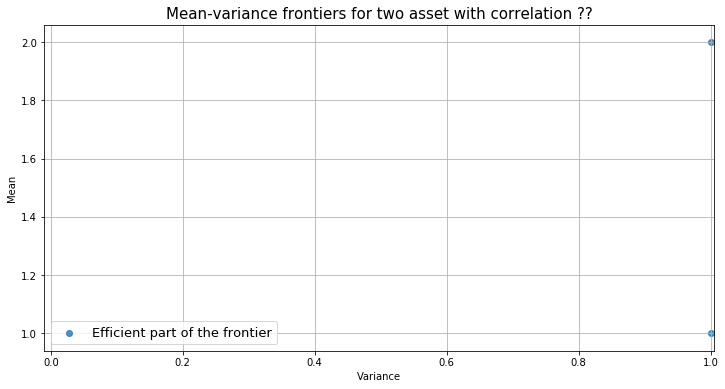

In [21]:
fig = plt.figure(figsize = (12,6))
plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')



plt.xlabel('Variance')
plt.ylabel('Mean')
plt.xlim(-0.01)
plt.legend(loc='lower left', fontsize = 13)
plt.title('Mean-variance frontiers for two asset with correlation ??', fontsize = 15)
plt.grid(True)

Python zip() Function https://www.w3schools.com/python/ref_func_zip.asp

We use zip(X, Y) to create an iterator that produces tuples of the form (x, y).

In [ ]:
x = zip(mean, var)
list(x)

In [ ]:
def mean_var_plot(mean, var, corr):
    fig = plt.figure(figsize = (22,9))              
    plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')
    
    if corr == 1:
        for mu, sigma in zip(mean, var):
            if mu < max(mean):
                plt.scatter(sigma, mu, color = 'tomato')
        plt.scatter(x= var[np.argmax(mean)], y = max(mean), 
                    lw = 8, label = 'Minimum variance achieved',  marker= "X", c ='gold', s=70)

    else:
        for mu, sigma in zip(mean, var):
            if mu < mean[np.argmin(var)]:
                plt.scatter(sigma, mu, color = 'tomato')
        plt.scatter(x= min(var), y = mean[np.argmin(var)], marker= "X",
                   lw = 8, label = 'Minimum variance achieved', c ='gold', s=70)                
            
    plt.xlabel('Variance')
    plt.ylabel('Mean')
    plt.xlim(-0.01)
    plt.legend(loc='lower left', fontsize = 13)
    plt.title('Mean-variance frontiers for two asset with correlation '+ str(corr), fontsize = 15)
    plt.grid(True)
    
    return

In [ ]:
#Case 1
cov1 = 0
cov_matrix1 = np.asarray([[var1, cov1],
              [cov1, var2]])
case1 = multivariate_normal(mean, cov_matrix1, size = 100)
mean_p1= portf_mean(weights, mean)
var_p1 = portf_var(weights, cov_matrix1)

In [ ]:
mean_p1[np.argmin(var_p1)]

In [ ]:
mean_var_plot(mean_p1, var_p1, corr = 0)

#### Case 2: Imperfectly positively correlated returns ($\rho =0.5$)

$$ \sigma^2_p = [1 - \omega(1 - \omega)]\sigma^2$$

Again, the maximum reduction in variance is achieved when the investment is equally split aross assets, but now:

$$ \sigma^2_p = \left[1 - \dfrac{1}{4}\right]\sigma^2 = \dfrac{3}{4}\sigma^2$$

Only a quarter of individual variance can be reduced. Losses are offset by gains but assets returns tend to move in the same direction, so such compensations across assets are less frequent.


In [ ]:
#Case 2
cov2 = 0.5
cov_matrix2 = [[var1, cov2],
              [cov2, var2]]
case2 = multivariate_normal(mean, cov_matrix2, size = 100)
mean_p2= portf_mean(weights, mean)
var_p2 = portf_var(weights,cov_matrix2)

mean_var_plot(mean_p2, var_p2, corr = 0.5)

#### Case 3: Perfectly positively correlated returns ($\rho = 1$)

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)(1-1)]\sigma^2 = \sigma^2$$

Since assets always move in the same direction, there is no diversification gains.


In [ ]:
#Case 3
cov3 = 1
cov_matrix3 = [[var1, cov3],
              [cov3, var2]]
case3 = multivariate_normal(mean, cov_matrix3, size = 100)
mean_p3= portf_mean(weights, mean)
var_p3 = portf_var(weights, cov_matrix3)

mean_var_plot(mean_p3, var_p3, corr = 1)

#### Case 4: Imperfectly negatively correlated returns  ($\rho = -0.5$)

$$ \sigma^2_p = [1 - 3\omega(1 - \omega)]\sigma^2 $$

With $\omega = 1/2$:

$$ \sigma^2_p = \left[1 - \dfrac{3}{4}\right]\sigma^2 = \dfrac{1}{4}\sigma^2$$

Losses on one asset are offset by gains on the other. This happens more frequently than in the no correlation case, as asset returns tend to move in opposite directions.


In [ ]:
#Case 4
cov4 = -0.5
cov_matrix4 = [[var1, cov4],
              [cov4, var2]]
case4 = multivariate_normal(mean, cov_matrix4, size = 100)
mean_p4= portf_mean(weights, mean)
var_p4 = portf_var(weights, cov_matrix4)

mean_var_plot(mean_p4, var_p4, corr = -0.5)

#### Case 5: Perfectly negatively correlated returns ($\rho = -1$)

$$ \sigma^2_p = [1 - 4\omega(1 - \omega)(1-1)]\sigma^2$$

Setting $\omega = 1/2$ we get:

$$ \sigma^2_p = \left[1 - \dfrac{4}{4}\right]\sigma^2 = 0 $$

In this case losses are always compensated with gains so we can completely eliminate variance. Instead of risk diversification, we are actually talking about *risk hedging*. 

In [ ]:
#Case 5
cov5 = -1
cov_matrix5 = [[var1, cov5],
              [cov5, var2]]
case5 = multivariate_normal(mean, cov_matrix5, size = 100)
mean_p5= portf_mean(weights, mean)
var_p5 = portf_var(weights, cov_matrix5)

mean_var_plot(mean_p5, var_p5, corr = -1)

In [ ]:
fig = plt.figure(figsize = (22,9))              
plt.scatter(var_p1, mean_p1, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 1: no correlation')
plt.scatter(var_p2, mean_p2, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 2: 0.5 correlation') 
plt.scatter(var_p3, mean_p3, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 3: perfect positive correlation') 
plt.scatter(var_p4, mean_p4, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 4: -0.5 correlation') 
plt.scatter(var_p5, mean_p5, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 5: perfect negative correlation') 

plt.xlabel('Variance', fontsize = 15)
plt.ylabel('Mean', fontsize = 15)
plt.xlim(0)
plt.legend(loc='lower left', fontsize = 15)
plt.grid(True)
plt.title('Mean-variance frontiers for different correlations', fontsize = 17)

In [ ]:
def returns_plot(cov):
    cov_matrix = np.asarray([[1, cov],
              [cov, 1]])
    mean = [0,0]
    case = multivariate_normal(mean, cov_matrix, size = 1000)
    
    fig = plt.figure(figsize = (10,7))
    
    plt.scatter(x=case[:,0], y=case[:,1])
    plt.xlabel('Asset 1 returns')
    plt.ylabel('Asset 2 returns')
    plt.title('Scatter plot of assets returns with correlation '+ str(cov))
    plt.xlim(-4,4)
    plt.grid(True)
    
    return 

In [ ]:
cor = float(input("Correlation: "))
if cor> 1 or cor< -1:
    print('Error! Correlation must be between -1 and 1')
else:
    returns_plot(cor)

Let's now add a third asset.

In [ ]:
weights = np.zeros((2000,3))
for i in range(len(weights)):
    weights[i] = rand_weights(3)

In [ ]:
noa = 3
n_obs = 10000

return_vec = np.random.randn(noa, n_obs)

In [ ]:
return_vec.shape

In [ ]:
np.mean(return_vec, axis = 1)

In [ ]:
np.cov(return_vec)

In [ ]:
pmean= portf_mean(weights, np.mean(return_vec, axis = 1))
pvar = portf_var(weights, np.cov(return_vec))


fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.grid(True)
plt.title('Mean-variance of a portfolio with three assets', fontsize = 17)
plt.xlabel('Variance', fontsize = 14)
plt.ylabel('Mean', fontsize = 14)
plt.colorbar(label = 'Sharpe ratio')
;

The graph above shows that when we invest in the three assets simultaneously, not only do we have access to more combinations of mean and variance, but also to better combinations. By adding a third asset to the portfolio, we profit from further diversification gains.

When calculating the Shapre ratio we assume $R_f = 0$